In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_dirs = ["/public/home/lizw/software/font"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30

In [39]:
Long_C_CG = pd.read_csv('/public/home/lizw/task/pore_c/methylation/merge_CG_level_size_in_interval.csv',converters={'chrom':str})
Long_C_CG['start']  = [int(x[0][1:]) for x in Long_C_CG['interval'].str.split(',')]
Long_C_CG['end'] = [int(x[1][:-1]) for x in Long_C_CG['interval'].str.split(',')]

In [40]:
kee_bed = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/kee/kee.bed',header=None,names=['chrom','start','end','name'])

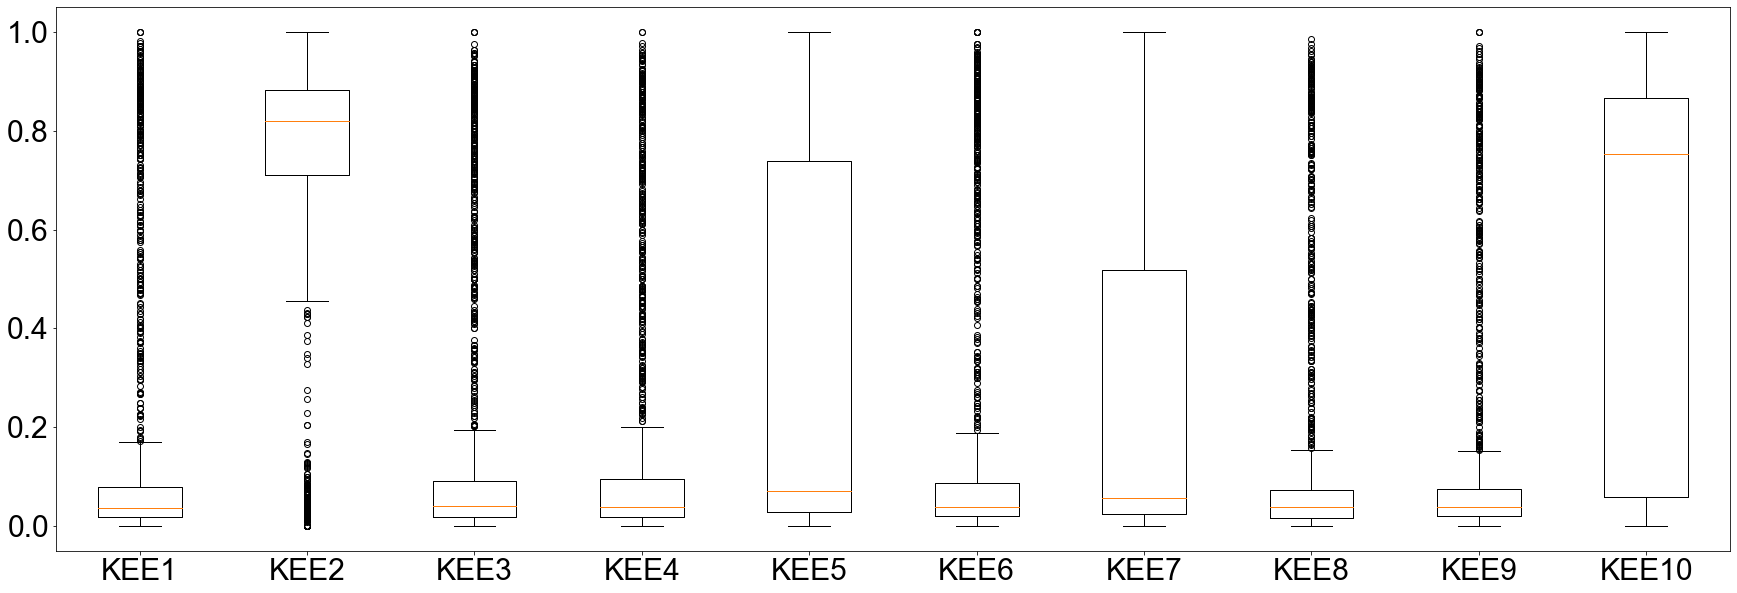

In [46]:
kee_met = dict()
for i in kee_bed.itertuples(index=False):
    chrom,start,end,name = i
    chrom_int = str(chrom)
    kee_met_df = Long_C_CG.query('(chrom == @chrom_int) & (start >= @start) & (end <= @end)' ).dropna()
    kee_met[name] = kee_met_df['met_level']

fig, ax = plt.subplots(1,figsize=(30,10))
# Python 3.5+
dict1 = kee_met
labels, data = [*zip(*dict1.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
labels, data = dict1.keys(), dict1.values()


ax.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

In [49]:
telo_bed = pd.read_table('/public/home/lizw/task/pore_c/porec_1000_filter_mainchr_result/porecplot_v3/porec_pre_v2.9/telo/telo_300k_no_NOR.bed',header=None,names=['chrom','start','end','name'])

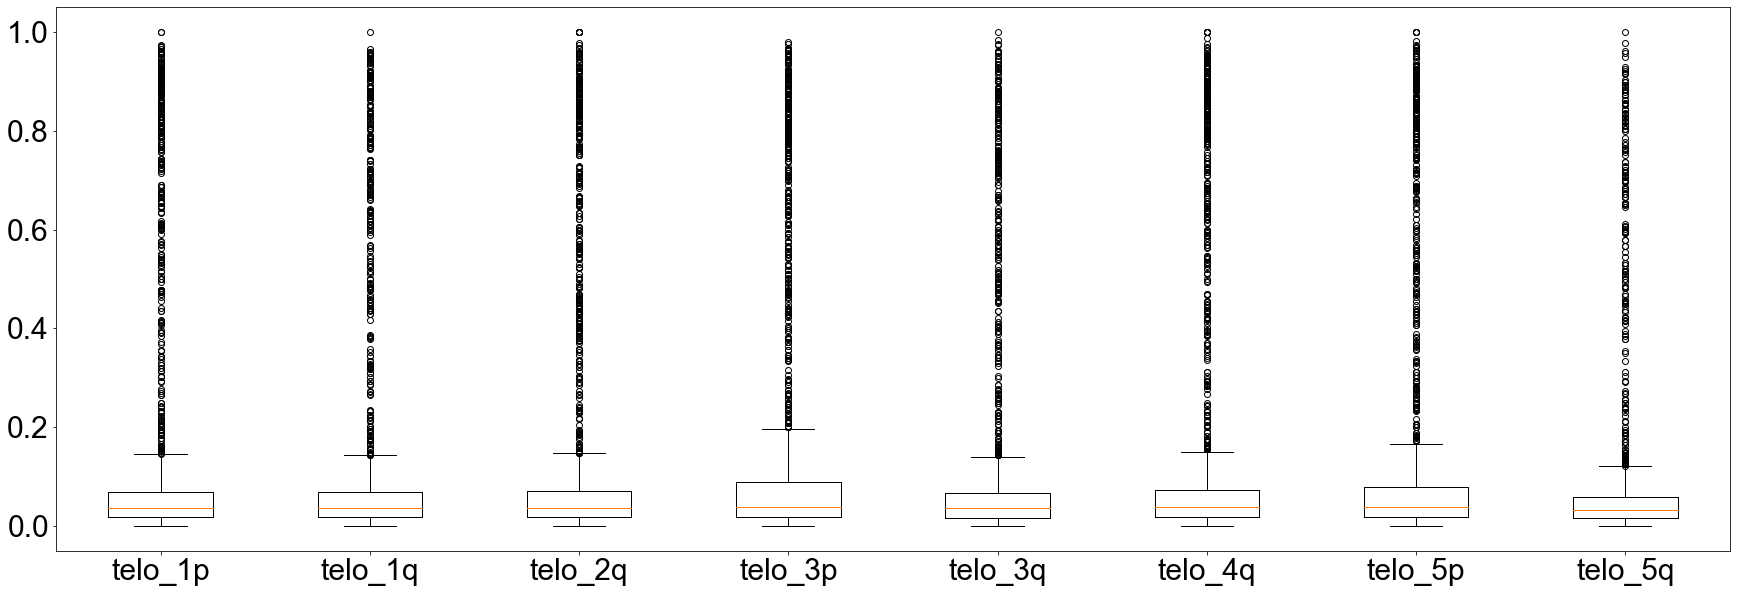

In [50]:
telo_met = dict()
for i in telo_bed .itertuples(index=False):
    chrom,start,end,name = i
    chrom_int = str(chrom)
    telo_met_df = Long_C_CG.query('(chrom == @chrom_int) & (start >= @start) & (end <= @end)' ).dropna()
    telo_met[name] = telo_met_df['met_level']

fig, ax = plt.subplots(1,figsize=(30,10))
# Python 3.5+
dict1 = telo_met
labels, data = [*zip(*dict1.items())]  # 'transpose' items to parallel key, value lists

# or backwards compatable    
labels, data = dict1.keys(), dict1.values()
ax.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()